# 에러 제어 방법

##### 1) 에러내용을 구글에 검색

##### 2) stackoverflow에서 찾기

# 예외처리

In [1]:
try:
    print('여긴 어때?')
    1 + '1'
    print('여긴?')
except:
    print('안녕안녕')


여긴 어때?
안녕안녕


In [3]:
try:
    print('여긴 어때?')
    1 + '1'
    print('여긴?')
except Exception as e:
    print(e)
    print('안녕안녕')

여긴 어때?
unsupported operand type(s) for +: 'int' and 'str'
안녕안녕


In [4]:
try:
    print('여긴 어때?')
    [1,2,3]*3.5
    print('여긴?')
except Exception as e:
    print(e)
    print('안녕안녕')

여긴 어때?
can't multiply sequence by non-int of type 'float'
안녕안녕


In [5]:
try:
    print('여긴 어때?')
    [1,2,3]*3.5
    print('여긴?')
except Exception as e:
    print(e)
    print('안녕안녕')
finally:

SyntaxError: unexpected EOF while parsing (<ipython-input-5-84d1a9f322ff>, line 8)

# 좋은코드

## 재귀함수

In [27]:
def fibo(n):
    if n == 1 or n == 2:
        return 1
    else:
        result = fibo(n - 1) + fibo(n - 2)
        return result

In [28]:
fibo(5)

5

In [29]:
import time
t0 = time.time()
fibo(33)
t1=time.time() -t0
print(t1)

0.9404218196868896


In [30]:
import time
def timer(n):
    t0 = time.time()
    fibo(n)
    t1=time.time() - t0
    return t1

t_list = []
for i in range(37):
    t_list.append(timer(i+1))

In [31]:
t_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0009996891021728516,
 0.0009989738464355469,
 0.0009999275207519531,
 0.003997802734375,
 0.004996538162231445,
 0.004997968673706055,
 0.007994651794433594,
 0.013989925384521484,
 0.019988059997558594,
 0.032979488372802734,
 0.05296730995178223,
 0.08594727516174316,
 0.136915922164917,
 0.219865083694458,
 0.36577558517456055,
 0.7435445785522461,
 0.9674060344696045,
 1.6130084991455078,
 2.576418161392212,
 4.392303943634033,
 7.660295724868774]

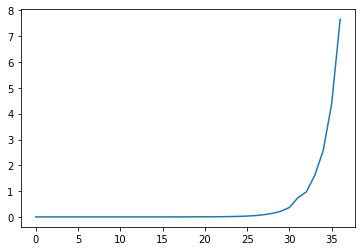

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(t_list)

# 리팩터링

In [37]:
def bottomup(n):
    list_start = [1,1]
    for i in range(n):
        next_num = list_start[-1] + list_start[-2]
        list_start.append(next_num)
    return list_start[n-1]
bottomup(1000)

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

In [42]:
import time
def timer(n):
    t0 = time.time()
    bottomup(n)
    t1=time.time() - t0
    return t1

t_list2 = []
for i in range(100):
    t_list2.append(timer(i+1))

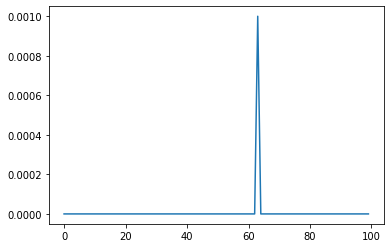

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(t_list2)

# 클래스

In [44]:
print(type(5))
print(type(50))

<class 'int'>
<class 'int'>


In [45]:
print(type(5.0))
print(type(50.0))

<class 'float'>
<class 'float'>


In [46]:
print(type(5.0))
print(type(5))

<class 'float'>
<class 'int'>


In [49]:
print(type([1,2,3]))
print(type((1,2,3)))
print(type({1,2,3}))

<class 'list'>
<class 'tuple'>
<class 'set'>


In [ ]:
a = [1, 2 , 3]
b = (1, 2, 3)

In [52]:
class calculator():
    def __init__(self, number):
        self.value = number

In [54]:
a = calculator(10)
a2 = calculator(20)
print(a.value)
print(a2.value)

10
20


In [56]:
class calculator():
    def __init__(self, number):
        self.value = number
    def plus(self, new_number):
        print(self.value + new_number)
    def minus(self, new_number):
        print(self.value - new_number)
    def multiply(self, new_number):
        print(self.value * new_number)
    def divide(self, new_number):
        print(self.value / new_number)

In [57]:
a = calculator(10)

In [61]:
a.divide(10)

1.0


# 클로저

In [1]:
def circle(pi):
    def area(r):
        return pi * (r**2)
    return area

In [2]:
c1 = circle(3.141)
c2 = circle(3.141592)
print(c1(10))
print(c2(10))

314.1
314.1592


# 데코레이터

In [3]:
def multiply(a, b):
    return a * b

print('함수가 실행되었습니다.')
multiply(3, 4)
print('함수가 종료되었습니다.')

함수가 실행되었습니다.
함수가 종료되었습니다.


In [5]:
import pandas as pd
help(pd.DataFrame.agg)

Help on function aggregate in module pandas.core.frame:

aggregate(self, func, axis=0, *args, **kwargs)
    Aggregate using one or more operations over the specified axis.
    
    .. versionadded:: 0.20.0
    
    Parameters
    ----------
    func : function, str, list or dict
        Function to use for aggregating the data. If a function, must either
        work when passed a DataFrame or when passed to DataFrame.apply.
    
        Accepted combinations are:
    
        - function
        - string function name
        - list of functions and/or function names, e.g. ``[np.sum, 'mean']``
        - dict of axis labels -> functions, function names or list of such.
    axis : {0 or 'index', 1 or 'columns'}, default 0
            If 0 or 'index': apply function to each column.
            If 1 or 'columns': apply function to each row.
    *args
        Positional arguments to pass to `func`.
    **kwargs
        Keyword arguments to pass to `func`.
    
    Returns
    -------
    sc

In [6]:
def sample(*args):
    print(args)

In [8]:
sample(1, 2, 3, 4, 5)

(1, 2, 3, 4, 5)


In [9]:
def sample(**kwargs):
    print(kwargs)

In [10]:
sample(a=1, b=2, c=3, d=4, e=5)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}


In [14]:
def print_info(func):
    def wrapper(*args, **kwargs):
        print('함수가 실행되었습니다.')
        result = func(*args, **kwargs)
        print('함수가 종료되었습니다.')
        return result
    return wrapper

In [15]:
f = print_info(multiply)
f(3,4)

함수가 실행되었습니다.
함수가 종료되었습니다.


12

In [16]:
@print_info
def add(a,b):
    return a + b
add(3,4)

함수가 실행되었습니다.
함수가 종료되었습니다.


7

# 네임스페이스/스코프 두번째시간

In [19]:
from math import pi

def outer():
    print(pi)

print(pi)
pi = '글로벌'
outer()

3.141592653589793
글로벌


In [22]:
from math import pi

def outer():
    pi = 'outer 함수기준 local'
    print(pi)

print(pi)
pi = '글로벌'
outer()
print(pi)

3.141592653589793
outer 함수기준 local
글로벌


In [23]:
def outer():
    pi = 'outer 함수기준 local'
    print(pi)

print(pi)
pi = '글로벌'
outer()
print(pi)

글로벌
outer 함수기준 local
글로벌


In [24]:
from math import pi

def outer():
    pi = 'outer 함수기준 local, inner 함수 기준 enclosed'
    def inner():
        pi = 'inner 함수 기준 local'
        print(pi)
    inner()
    print(pi)

print(pi)
pi = '글로벌'
outer()

3.141592653589793
inner 함수 기준 local
outer 함수기준 local, inner 함수 기준 enclosed


In [25]:
from math import pi

def outer():
    pi = 'outer 함수기준 local, inner 함수 기준 enclosed'
    def inner():
        #pi = 'inner 함수 기준 local' 메모남기기
        print(pi)
    inner() #Enclosed 안에 있는 pi = 'outer 함수기준 local, inner 함수 기준 enclosed' 를 print함
    print(pi)

print(pi)
pi = '글로벌'
outer()

3.141592653589793
outer 함수기준 local, inner 함수 기준 enclosed
outer 함수기준 local, inner 함수 기준 enclosed


In [26]:
from math import pi

def outer():
    #pi = 'outer 함수기준 local, inner 함수 기준 enclosed'
    def inner():
        pi = 'inner 함수 기준 local'
        print(pi)
    inner()
    print(pi)

print(pi)
pi = '글로벌'
outer()

3.141592653589793
inner 함수 기준 local
글로벌


In [27]:
from math import pi

def outer():
    #pi = 'outer 함수기준 local, inner 함수 기준 enclosed'
    def inner():
        pi = 'inner 함수 기준 local'
        print(pi)
    inner()
    print(pi)

print(pi)
outer()

3.141592653589793
inner 함수 기준 local
3.141592653589793


In [28]:
from math import pi

def outer():
    #pi = 'outer 함수기준 local, inner 함수 기준 enclosed'
    def inner():
        pie = 'inner 함수 기준 local'
        print(pie)
    inner()
    print(pie)

print(pi)
outer()

3.141592653589793
inner 함수 기준 local


NameError: name 'pie' is not defined

# 내장함수 두번째 시간

##### zip, enumerate, input

In [31]:
num_list = [1, 2, 3, 4, 5]
str_sample = 'abcde'
list(zip(str_sample, num_list))

[('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5)]

In [32]:
num_list = [1, 2, 3, 4, 5, 6]
str_sample = 'abcde'
list(zip(str_sample, num_list))

[('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5)]

In [33]:
num_list = [1, 2, 3, 4, 5, 6]
str_sample = 'abcde'
dict(zip(str_sample, num_list))

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}

In [41]:
my_data = ['스시', '파스타', '국밥', '짬뽕']
n = 0
for d in my_data:
    print(d)
    print(n)
    n = n + 1

스시
0
파스타
1
국밥
2
짬뽕
3


In [42]:
my_data = ['스시', '파스타', '국밥', '짬뽕']
for n, d in enumerate(my_data):
    print(d)
    print(n)

스시
0
파스타
1
국밥
2
짬뽕
3


In [43]:
my_data = ['스시', '파스타', '국밥', '짬뽕']
for d, n in enumerate(my_data):
    print(d)
    print(n)

0
스시
1
파스타
2
국밥
3
짬뽕


In [44]:
my_data = ['스시', '파스타', '국밥', '짬뽕']
for d, n in enumerate(my_data):
    print(n)
    print(d)

스시
0
파스타
1
국밥
2
짬뽕
3


In [45]:
a = input()
b = input()
c = a + b
print(c)

5
10
510


In [46]:
a = input()
b = input()
c = int(a) + int(b)
print(c)

5
10
15


In [47]:
hex(419668748)

'0x1903a30c'

# 이터레이터, 제너레이터

In [49]:
sample = [1, 2, 3, 4, 5]
sample[2] = -1
sample

[1, 2, -1, 4, 5]

In [50]:
sample = [1, 2, 3, 4, 5]
sample[2:4] = -1
sample

TypeError: can only assign an iterable

In [51]:
sample = [1, 2, 3, 4, 5]
sample[2:4] = [-1, -1]
sample

[1, 2, -1, -1, 5]

In [52]:
dir(sample)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [53]:
ads = -1
dir(ads)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes']

In [54]:
new = sample.__iter__()

In [55]:
dir(new)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__length_hint__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [62]:
new.__next__()

StopIteration: 

In [64]:
for d in sample:
    print(d)

1
2
-1
-1
5


In [65]:
def multiply(a, b):
    return a * b
dir(multiply)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [66]:
for i in range(5):
    print(i)

0
1
2
3
4


In [67]:
for i in [0, 1, 2, 3, 4]:
    print(i)

0
1
2
3
4


In [68]:
a = [0, 1, 2, 3, 4,]
b = range(5)
c = a.__iter__()
print(a.__sizeof__())
print(b.__sizeof__())
print(c.__sizeof__())

80
48
32


# 제너레이터

In [69]:
def sim_gen():
    print('1번 지점')
    yield 1
    print('2번 지점')
    yield 2
    print('3번 지점')
    yield 3
a = sim_gen()

In [70]:
dir(a)

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [71]:
aa = a.__iter__()

In [75]:
aa.__next__()

StopIteration: 

### 넓이를 구하는 메소드

### 굴레를 구하는 메소드